In [0]:
import sys, os, platform, inspect

def get_current_file_path():
  # script filename (usually with path)
  filename = inspect.getfile(inspect.currentframe())
  # script directory
  path = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
  return filename, path

if platform.system() == 'Linux' : # Colab setting
  print('Linux')
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)
  path = '/content/gdrive/My Drive/Cours/Udacity_DeepLearning 2019/project-dog-classification'
else:
  _, path = get_current_file_path()
  
sys.path.insert(0, path)
os.chdir(path)


Linux
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [0]:
import numpy as np
from glob import glob

# load filenames for human images and dog images
human_files = np.array(glob("lfw/*/*"))
print('There are %d total human images.' % len(human_files))
dog_files = np.array(glob("dogImages/*/*/*"))
print('There are %d total dog images.' % len(dog_files))




There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans
In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


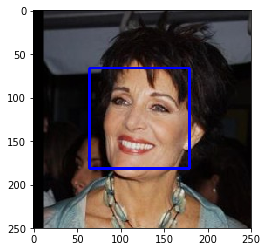

In [0]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
#print(type(img))
#print(img.shape)
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(gray.shape)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [0]:
from tqdm import tqdm


human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
p1 = len(list(filter(face_detector, human_files_short)))
print(f"Percentage human faces in human_files_short : {p1}%")
p2 = len(list(filter(face_detector, dog_files_short)))
print(f"Percentage human faces in dog_files_short : {p2}%")

Percentage human faces in human_files_short : 99%
Percentage human faces in dog_files_short : 18%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import random

class FaceDataset(Dataset) :
  
  def __init__(self, humans, dogs, trans):
    """
    Args:
    humans: array of image file names for human faces
    dogs : array of image file names for dog faces
    trans (callable) : transformations to be applied on an image
    """
    self.faces = [(h, 0) for h in humans] + [(d, 1) for d in dogs]
    random.shuffle(self.faces)
    self.transform = trans
    
  def __len__(self):
    return len(self.faces)
  
  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.item()
      
    image = self.transform(Image.open(self.faces[idx][0]))
    category = self.faces[idx][1]
    return (image, category)
  
trans = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

train_data = FaceDataset(human_files[200:], dog_files[200:], trans)
valid_data = FaceDataset(human_files[100:200], dog_files[100:200], trans)
test_data = FaceDataset(human_files[:100], dog_files[:100], trans)
train_loader = DataLoader(train_data, shuffle = True, batch_size = 16)
valid_loader = DataLoader(valid_data, shuffle = True, batch_size = 16)
test_loader = DataLoader(test_data, shuffle = True, batch_size = 16)

loaders_faces = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}
  


### Architecture of CNN

In [0]:

import torch
import torch.nn as nn
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()

# define the CNN architectur
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # Define layers of a CNN
    # convolutional layer - input is 32 * 3 * 224 * 224
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
    # Pooling
    self.pool = nn.MaxPool2d(4,4)
    
    # linear layer : 32 * 14 * 14 -> 512
    self.fc1 = nn.Linear(32 * 14 * 14, 512)
    # linear layer : 512 -> 64
    self.fc2 = nn.Linear(512, 64)
    # linear layer : 64 -> 2
    self.fc3 = nn.Linear(64, 2)

    # Dropout
    self.dropout = nn.Dropout(0.3)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))

    # Flatten image input
    x = x.view(-1, 32 * 14 * 14)
    x = self.dropout(x)  # dropout
    # Fully connected layer fc1
    x = F.relu(self.fc1(x))
    x = self.dropout(x) # dropout
    # Fully connected layer fc2
    x = F.relu(self.fc2(x))
    x = self.dropout(x) # dropout 
    # Fully connected layer fc3 = output layer
    x = self.fc3(x)
    
    return x
  

model_faces = Net()
if use_cuda :
  model_faces.cuda()


### Specify Loss Function and Optimizer

In [0]:
import torch.optim as optim
criterion_faces = nn.CrossEntropyLoss()
optimizer_faces = optim.SGD(model_faces.parameters(), lr=0.0008, momentum=0.97)

### Train the model

In [0]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
  """ returns trained model """
  # initialize tracker for minimum validation loss
  valid_loss_min = np.Inf
  
  for epoch in range(1, n_epochs + 1) :
    # initialize variables to monitor training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ########################
    #  Train the model     #
    ########################
    model.train()  # enable dropout
    for batch_idx, (data, target) in enumerate(loaders['train']):
      #print('data shape = ', data.shape)
      #print ('target shape = ', target.shape)
      if use_cuda :
        data, target = data.cuda(), target.cuda()
      optimizer.zero_grad()
      output = model(data)  # forward pass
      loss = criterion(output, target)
      loss.backward()  # backward pass
      optimizer.step() # gradient descent : update the weights
      #  total training loss increased with loss for a complete batch
      train_loss += loss.item() * data.size(0) 
      # average training loss : this one must decrease
      avg_train_loss = train_loss / (batch_idx + 1)
      
    ########################
    #  Validate the model  #
    ########################
    model.eval() # disable dropout
    for batch_idx, (data, target) in enumerate(loaders['valid']):
      if use_cuda :
        data, target = data.cuda(), target.cuda()
      with torch.no_grad():
        output = model(data)
      loss = criterion(output, target)
      valid_loss += loss.item() * data.size(0)
      avg_valid_loss = valid_loss / (batch_idx + 1)
      
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
      epoch, 
      avg_train_loss,
      avg_valid_loss
    ))
    
    # Save the model if validation loss has decreased
    if avg_valid_loss <= valid_loss_min :
      print('Validation loss has decreased ({:.6f}-->{:.6f}). Saving model...'
            .format(valid_loss_min, avg_valid_loss))
      torch.save(model.state_dict(), save_path)
      valid_loss_min = avg_valid_loss
      
  return model

# train the model
try :
  model_faces.load_state_dict(torch.load('model_faces.pt'))
  print("Starting from previously trained model")
except FileNotFoundError :
  print("Starting : initialization of classifier weights (random uniform)")
  
model_faces = train(100, loaders_faces, model_faces, optimizer_faces, 
                      criterion_faces, use_cuda, 'model_faces.pt')

# load the model that got the best validation accuracy
model_faces.load_state_dict(torch.load('model_faces.pt'))  

Starting from previously trained model


KeyboardInterrupt: ignored

### test the model

In [0]:
model_faces.load_state_dict(torch.load('model_faces.pt'))
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_faces, model_faces, criterion_faces, use_cuda)

Test Loss: 0.001459


Test Accuracy: 100% (200/200)


In [0]:
def my_face_detector(img_path):
    # load the image and return the predicted face : human or dog
    img = Image.open(img_path)
    transformations = transforms.Compose([transforms.Resize(256),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor()])
    img_tensor = transformations(img).unsqueeze(0)
    if use_cuda :
      img_tensor = img_tensor.cuda()
    model_faces.eval()
    with torch.no_grad() :
      output = model_faces(img_tensor)
    output = output.cpu().numpy().flatten()
    # print(output)
    result = np.where(output == np.amax(output))
    return (result[0][0] == 0) # True if human face , False if dog face

p1 = len(list(filter(my_face_detector, human_files_short)))
print(f"Percentage human faces in human_files_short : {p1}%")
p2 = len(list(filter(my_face_detector, dog_files_short)))
print(f"Percentage human faces in dog_files_short : {p2}%")



Percentage human faces in human_files_short : 100%
Percentage human faces in dog_files_short : 0%


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [0]:
import torch
import torchvision.models as models
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)
# check if cuda is available
use_cuda = torch.cuda.is_available()
# move model to GPU if CUDA is available
if use_cuda:
  VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:19<00:00, 28543079.55it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
  trans = transforms.Compose([
      transforms.RandomResizedCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.486], std=[0.229, 0.224, 0.225])
  ])
  input = trans(Image.open(img_path))
  input = input.view(1, 3, 224, 224)
  input = input.cuda()
  VGG16.eval()
  with torch.no_grad():
    output = VGG16(input)
  
  prediction = int(torch.max(output, 1)[1].cpu().numpy())
  return prediction

VGG16_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path) :
  prediction = VGG16_predict(img_path)
  return prediction >= 151 and prediction <= 268


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In [0]:
p1 = len(list(filter(dog_detector, human_files_short)))
print(f"Percentage dog faces in human_files_short : {p1}%")
p2 = len(list(filter(dog_detector, dog_files_short)))
print(f"Percentage dog faces in dog_files_short : {p2}%")

Percentage dog faces in human_files_short : 2%
Percentage dog faces in dog_files_short : 90%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

INC3 = models.inception_v3(pretrained = True)
if use_cuda :
  INC3 = INC3.cuda()

def INC3_predict(img_path):
  trans = transforms.Compose([
      transforms.RandomResizedCrop(299), # expects tensors N * 3 * 299 * 299
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.486], std=[0.229, 0.224, 0.225])
  ])
  input = trans(Image.open(img_path))
  input = input.view(1, 3, 299, 299)
  if use_cuda :
    input = input.cuda()
  INC3.eval()
  with torch.no_grad():
    output = INC3(input)
  
  prediction = int(torch.max(output, 1)[1].cpu().numpy())
  return prediction

def dog_detector_inc3(img_path) :
  prediction = INC3_predict(img_path)
  return prediction >= 151 and prediction <= 268

p1 = len(list(filter(dog_detector_inc3, human_files_short)))
print(f"Percentage dog faces in human_files_short : {p1}%")
p2 = len(list(filter(dog_detector_inc3, dog_files_short)))
print(f"Percentage dog faces in dog_files_short : {p2}%")


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 72390954.52it/s]


Percentage dog faces in human_files_short : 3%
Percentage dog faces in dog_files_short : 95%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import os
import torch
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
train_data = datasets.ImageFolder('dogImages/train', transform = train_transforms)
valid_data = datasets.ImageFolder('dogImages/valid', transform = train_transforms)
test_data = datasets.ImageFolder('dogImages/test', transform = test_transforms)
train_loader = torch.utils.data.DataLoader(train_data, shuffle = True, batch_size = 32)
valid_loader = torch.utils.data.DataLoader(valid_data, shuffle = True, batch_size = 32)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 32)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**:
Transformations are applied to resize the input images to a size of 3 * 224 * 224, the same input size as required for VGG16 (and therefore an acceptable size).
Additional transformations (data augmentation) are applied to the training data : random rotation, random horizontal flip, and also randomness in the resizing operation. The objective is to  obtain a more robust model, i.e. a model that generalizes better. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import torch.nn as nn
import torch.nn.functional as F

use_cuda = torch.cuda.is_available()

# define the CNN architectur
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # Define layers of a CNN
    # convolutional layer - input is 32 * 3 * 224 * 224
    self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
    # convolutional layer - input is 32 * 32 * 112 * 112
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
    # convolutional layer - input is 32 * 64 * 56 * 56
    self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
    # convolutional layer - input is 32 * 128 * 28 * 28
    self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
    # Pooling
    self.pool = nn.MaxPool2d(2,2)
    
    # linear layer : 128 * 14 * 14 -> 1024
    self.fc1 = nn.Linear(128 * 14 * 14, 1024)
    # linear layer : 1024 -> 512
    self.fc2 = nn.Linear(1024, 512)
    # linear layer (output) : 512 -> 133
    self.fc3 = nn.Linear(512, 133)

    # Dropout
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.pool(F.relu(self.conv4(x)))
    # Flatten image input
    x = x.view(-1, 128 * 14 * 14)
    x = self.dropout(x)  # dropout
    # Fully connected layer fc1
    x = F.relu(self.fc1(x))
    x = self.dropout(x) # dropout
    # Fully connected layer fc2
    x = F.relu(self.fc2(x))
    x = self.dropout(x) # dropout 
    # Fully connected layer fc3 = output layer
    x = self.fc3(x)
    
    return x
  
def weights_init_normal(m):
  classname = m.__class__.__name__
  # for every linear layer in a model
  if classname.find('Linear') != -1 :
    n = m.in_features
    y = (1.0/np.sqrt(n))
    m.weight.data.normal_(0,y)
    m.bias.data.fill_(0)

model_scratch = Net()
model_scratch.apply(weights_init_normal)

if use_cuda:
  model_scratch.cuda()
 


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step. 

__Answer:__ Starting from 224 * 224 input images, the convolutional layers reduce the area of the images and increase their depth in order to provide enough features for classification Area reduction is done by the max pool and depth increase corresponds to the number of filters  in each convolutional layer. To go from 3 * 224 * 224 to 128 * 14 * 14 with increase/decrease factors of 2, four convolutional layers are applied. 
The classification is carried out by the fully connected layers. Three such layers are applied in order to go progressively from 120 * 14 * 14 to 133, the number of classes. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.96)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
  """ returns trained model """
  # initialize tracker for minimum validation loss
  valid_loss_min = np.Inf
  
  for epoch in range(1, n_epochs + 1) :
    # initialize variables to monitor training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ########################
    #  Train the model     #
    ########################
    model.train()  # enable dropout
    for batch_idx, (data, target) in enumerate(loaders['train']):
      #print('data shape = ', data.shape)
      #print ('target shape = ', target.shape)
      if use_cuda :
        data, target = data.cuda(), target.cuda()
      optimizer.zero_grad()
      output = model(data)  # forward pass
      loss = criterion(output, target)
      loss.backward()  # backward pass
      optimizer.step() # gradient descent : update the weights
      #  total training loss increased with loss for a complete batch
      train_loss += loss.item() * data.size(0) 
      # average training loss : this one must decrease
      avg_train_loss = train_loss / (batch_idx + 1)
      
    ########################
    #  Validate the model  #
    ########################
    model.eval() # disable dropout
    for batch_idx, (data, target) in enumerate(loaders['valid']):
      if use_cuda :
        data, target = data.cuda(), target.cuda()
      with torch.no_grad():
        output = model(data)
      loss = criterion(output, target)
      valid_loss += loss.item() * data.size(0)
      avg_valid_loss = valid_loss / (batch_idx + 1)
      
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
      epoch, 
      avg_train_loss,
      avg_valid_loss
    ))
    
    # Save the model if validation loss has decreased
    if avg_valid_loss <= valid_loss_min :
      print('Validation loss has decreased ({:.6f}-->{:.6f}). Saving model...'
            .format(valid_loss_min, avg_valid_loss))
      torch.save(model.state_dict(), save_path)
      valid_loss_min = avg_valid_loss
      
  return model

# train the model
try :
  model_scratch.load_state_dict(torch.load('model_scratch.pt'))
  print("Starting from previously trained model")
except FileNotFoundError :
  print("Starting : initialization of classifier weights (random uniform)")
  
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))        

Starting from previously trained model
Epoch: 1 	Training Loss: 123.301957 	Validation Loss: 119.972029
Validation loss has decreased (inf-->119.972029). Saving model...
Epoch: 2 	Training Loss: 122.940785 	Validation Loss: 120.670310
Epoch: 3 	Training Loss: 122.608812 	Validation Loss: 121.037797
Epoch: 4 	Training Loss: 122.283121 	Validation Loss: 118.806993
Validation loss has decreased (119.972029-->118.806993). Saving model...
Epoch: 5 	Training Loss: 122.719533 	Validation Loss: 119.414740
Epoch: 6 	Training Loss: 121.992212 	Validation Loss: 118.697865
Validation loss has decreased (118.806993-->118.697865). Saving model...
Epoch: 7 	Training Loss: 121.341134 	Validation Loss: 120.247990
Epoch: 8 	Training Loss: 120.334794 	Validation Loss: 115.826860
Validation loss has decreased (118.697865-->115.826860). Saving model...
Epoch: 9 	Training Loss: 119.314900 	Validation Loss: 117.259887
Epoch: 10 	Training Loss: 119.419230 	Validation Loss: 116.156604
Epoch: 11 	Training Loss:

KeyboardInterrupt: ignored

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [0]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.540284


Test Accuracy: 17% (146/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [0]:
import torchvision.models as models
import torch.nn as nn
# define VGG16 model
model_transfer = models.vgg16(pretrained=True)
# Freeze training for all "feature" layers
for param in model_transfer.features.parameters():
  param.requires_grad = False
  
# Replace the last fully connected layer
n_inputs = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_inputs, 133)
model_transfer.classifier[6] = last_layer

# check if cuda is available
use_cuda = torch.cuda.is_available()
# move model to GPU if CUDA is available
if use_cuda:
  model_transfer = model_transfer.cuda() 
  

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
The VGG16 CNN is reused (transfer learning). The output layer is replaced to fit this classification task : 133 output nodes. The parameters of the feature layers (convolutions) do not need to be retained and there are frozen. Only the parameters of the classification layers (fully connected layers) are retrained for the specific task of classification.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.00075)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
try :
  model_transfer.load_state_dict(torch.load('model_transfer.pt'))
  print("Starting from existing trained model")
except FileNotFoundError :
  print("Starting : initialization of classifier weights (random uniform)")

model_transfer = train(100, loaders_transfer, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))   

Starting from existing trained model
Epoch: 1 	Training Loss: 66.724757 	Validation Loss: 59.634146
Validation loss has decreased (inf-->59.634146). Saving model...
Epoch: 2 	Training Loss: 65.719622 	Validation Loss: 58.415728
Validation loss has decreased (59.634146-->58.415728). Saving model...


KeyboardInterrupt: ignored

### (IMPLEMENTATION) Test the Model
Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [0]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))  
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.061260


Test Accuracy: 70% (587/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]

class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
  
    # load the image and return the predicted face : human or dog
    img = Image.open(img_path)
    transformations = transforms.Compose([transforms.Resize(256),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor()])
    img_tensor = transformations(img).unsqueeze(0)
    if use_cuda :
      img_tensor = img_tensor.cuda()
    model_transfer.eval()
    with torch.no_grad() :
      output = model_transfer(img_tensor)
    output = output.cpu().numpy().flatten()
    result = np.where(output == np.amax(output))
    return class_names[result[0][0]]

predict_breed_transfer('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

'Brussels griffon'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    breed = predict_breed_transfer(img_path)
    if my_face_detector(img_path) :
      print('hello, human!')
    else:
      if dog_detector(img_path) :
        print('hello dog!')
      else:
        print("Error: Failed to detect dog or human !!!!")
      
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()  
    print("You look like a ...\n" + breed)
    print("\n\n")
    return breed
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Error: Failed to detect dog or human !!!!


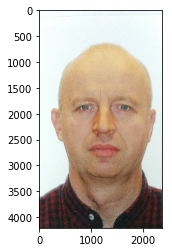

You look like a ...
Pharaoh hound



hello dog!


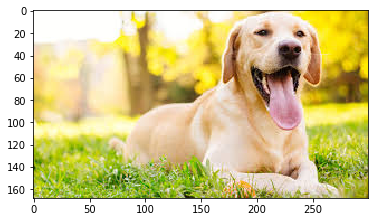

You look like a ...
Golden retriever



Error: Failed to detect dog or human !!!!


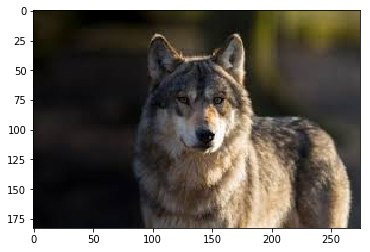

You look like a ...
Norwegian elkhound



hello dog!


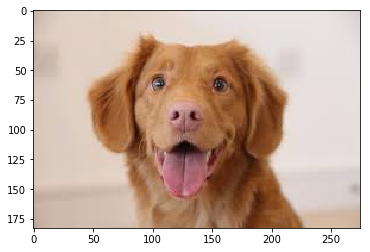

You look like a ...
Nova scotia duck tolling retriever



hello, human!


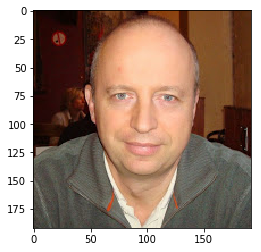

You look like a ...
Pharaoh hound



Error: Failed to detect dog or human !!!!


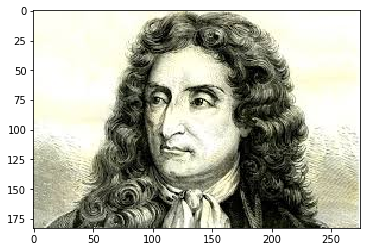

You look like a ...
English cocker spaniel



hello, human!


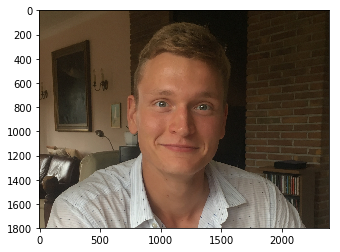

You look like a ...
Pharaoh hound





In [0]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
##for file in np.hstack((human_files[:3], dog_files[:3])):
##    run_app(file)
my_files = np.array(glob("my_images/*"))
for file in my_files :
  run_app(file)

Worse than expected : I had to crop my nephew's image in order to get him recognized as human ! 
### Possible Improvements
- Augment the data : additional transformations of the images. (e.g grayscale or randomgrayscale) 
- Add a third category to train the face detector : it means that the input data should include images that are neither humans nor dogs and that are labelled  "other".
- Improve the architecture : add one or two classification layers to model_transfer. It will of course take longer to train.

In [69]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	deleted:    dog_app.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	dog_app (1).ipynb

no changes added to commit (use "git add" and/or "git commit -a")
